# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import math 
import statistics 
import statsmodels.stats.api as sms
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:/Users/Process Research/Downloads/Frequentist Case Study/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

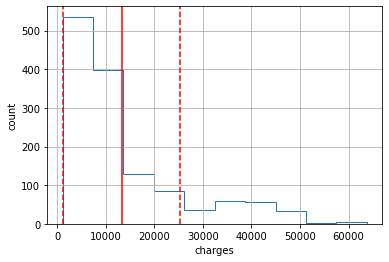

In [4]:
_ = medical.charges.hist(histtype='step', bins=10)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.axvline(13270, color='r')
_ = plt.axvline(13270+12110, color='r', linestyle='--')
_ = plt.axvline(13270-12110, color='r', linestyle='--')

In [5]:
medical.charges.mean(), medical.charges.std()

(13270.422265141257, 12110.011236693994)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Would use the population study to get the actual value, then use a sample distribution.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ *A one-sided hypothesis test is used when a null hypothesis specifies that, say, the effect of a medical treatment is negative. This would only be rejected by large positive values of a test statistic representing an estimated treatment effect. A two-sided test would be appropriate for a null hypothesis that a treatment effect, say, is exactly zero, and so both positive and negative estimates would lead to the null being rejected*. __In this case, a one-sided hypothesis makes sense__.

In [6]:
charges = pd.DataFrame(medical.charges)
charges.quantile(.025), charges.quantile(.975)

(charges    1631.733283
 Name: 0.025, dtype: float64,
 charges    46007.13095
 Name: 0.975, dtype: float64)

In [7]:
stats.zscore(charges)

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [8]:
sms.DescrStatsW(charges).tconfint_mean()

(array([12620.95403419]), array([13919.89049609]))

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both. __FOR INSURED AND NONINSURED PEOPLE__

__A:__ 

In [36]:
medical_ins = medical[medical.insuranceclaim == 1]
SD1 = np.std(medical_ins.charges,ddof=1)
M1 = np.mean(medical_ins.charges)
print("Standard Deviation for 1st sample = ", SD1)
print("Mean for 1st sample = ", M1)

Standard Deviation for 1st sample =  14045.928418802127
Mean for 1st sample =  16423.928276537663


In [37]:
medical_unins = medical[medical.insuranceclaim == 0]
SD2 = np.std(medical_unins.charges,ddof=1) 
M2 = np.mean(medical_unins.charges)
print("Standard Deviation for 2nd sample = ", SD2)
print("Mean for 2nd sample = ", M2)

Standard Deviation for 2nd sample =  6446.510126811736
Mean for 2nd sample =  8821.421892306294


In [41]:
# let's have 2 dataframes for both people with isurance and withoud:
no_insurance = medical[medical['insuranceclaim'] == 0]
insurance = medical[medical['insuranceclaim'] == 1]

# let's calculate the mean for both groups (x0: no_insurance) and (x1: insurance):
x0 = np.mean(no_insurance.charges)
x1 = np.mean(insurance.charges)

# let's calculate the count for both groups (n0: no_insurance) and (n1: insurance):
n0 = len(no_insurance)
n1 = len(insurance)

#the degrees of freedom are based on the sample sizes of the two groups.
df = n0+n1-2 
print(df)

# let's calculate the std for both groups (n0: no_insurance) and (n1: insurance):
s0 = np.std(no_insurance.charges,ddof=1) 
s1 = np.std(insurance.charges,ddof=1)

#Let's calculate manually the pooled standard deviation of the two groups:
sp_manually = ((((n0 - 1)*s0**2) + ((n1 - 1)*s1**2))/(df)) ** 0.5
print("The pooled standard deviation of the two groups:", sp_manually)

# Let's calculate manually t-test statistic:
t_manually = (x0 - x1)/((((1/n0) + (1/n1)) * 0.5)*sp_manually)
print(t_manually)

critical_value = t.ppf(0.025, df)
print(critical_value)

1336
The pooled standard deviation of the two groups: 11520.034268775256
-428.67844822581543
-1.9617412190546961


In [38]:
n0 = len(medical_ins)
n1 = len(medical_unins)              #calculate count for both groups (n0: no_insurance) and (n1: insurance):

df = n0+n1-2 
print(df)                        #the degrees of freedom are based on the sample sizes of the two groups.

sp_manually = ((((n0 - 1) * SD1**2) + ((n1 - 1)* SD2**2))/(df)) ** 0.5     
print("The pooled standard deviation of the two groups:", sp_manually)   #calculate manually the pooled std dev of 2 groups:

t_manually = (M1 - M2)/((((1/n0) + (1/n1)) * 0.5)* sp_manually)        #calculate manually t-test statistic:
print(t_manually)

critical_value = t.ppf(0.025, df)
print(critical_value)

1336
The pooled standard deviation of the two groups: 11520.034268775256
428.67844822581543
-1.9617412190546961


Since the t-test statistic (-11.89) is much smaller than the critical t value (-1.96), the p-value will be also smaller thanthe critical t value (-1.96) and therefore, we can conclude that our result is statistically significant and we reject the null hypothesis that the mean charge for people with and without insurance are equal.

In [46]:
stats.ttest_ind(medical_ins.charges, medical_unins.charges, equal_var = False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test